---
---
>> #  <center>**BRAIN TUMOR DETECTION AND CLASSIFICATION USING DEEP LEARNING**
---
---

### **Background Information**

Brain tumors represent one of the most severe types of cancer, significantly impacting patients' lives. Accurate and early diagnosis is critical to providing appropriate treatment and improving survival rates. MRI (Magnetic Resonance Imaging) is a widely used technique for detecting brain tumors, but manual analysis is time-consuming and subject to inter-observer variability.

Recent advancements in deep learning offer promising solutions for automated image analysis, aiming to assist radiologists and physicians in diagnosing brain tumors with greater speed and 
accuracy.

Deep learning models, especially Convolutional Neural Networks (CNNs), have proven to be effective in analyzing medical images. 

In this project, we focus on developing a CNN-based solution to automatically detect and classify brain tumors from MRI images. The model aims to distinguish between different types of tumors, providing valuable support in clinical decision-making.

### **Business Proposal**

**Objective:** Develop an AI-based system to automate the detection of brain tumors from MRI scans.

**Benefits:** This system can reduce diagnosis time, assist in the early detection of tumors, and minimize the workload on physicians and radiologists. Additionally, it has the potential to increase diagnostic accuracy and help medical facilities save costs related to manual analysis.

### **Data Science Problem**

Medical image classification presents challenges due to variations in image quality, tumor shapes, and sizes. The primary data science problem is to accurately classify brain tumor images into predefined categories using deep learning models, focusing on optimizing the model to handle class imbalance and improve generalization.

### **Importing Libraries**

In [4]:
from imports import *

### **Overview of the Dataset**

The dataset used for this project is a collection of MRI images of human brains, acquired from Kaggle through API access. It comprises a total of 7,023 images categorized into four classes:

- Glioma: A type of tumor that occurs in the brain and spinal cord, known for its aggressive growth patterns.
- Meningioma: A usually benign tumor that forms on membranes covering the brain and spinal cord just inside the skull.
- No Tumor: Images in this category represent healthy brain scans, serving as the control group.
- Pituitary: Tumors affecting the pituitary gland, which can cause a range of hormonal imbalances and other symptoms.

### **Data Structure and Distribution**
Each image is a 2D grayscale representation of an MRI scan, and the images vary in dimensions but are standardized during preprocessing for model training. The data is organized into separate directories for each class, allowing for straightforward loading and augmentation using deep learning frameworks like TensorFlow and Keras.

- Total Images: 7,023
- Number of Classes: 4 (Glioma, Meningioma, No Tumor, Pituitary)
- Image Type: Grayscale MRI images, standardized to a consistent size during preprocessing.




### **Data Acquisition Method**

The dataset was acquired through Kaggle’s API, enabling efficient downloading and integration into the project environment. This method ensures that the data remains up to date and can be easily replicated for further research or model retraining.

**Usefulness**
This dataset is particularly valuable for the development of deep learning models aimed at medical image classification. By providing labeled examples of different types of brain conditions, it allows for training a model to distinguish between healthy brains and those with different types of tumors. This has significant implications for assisting radiologists in the early detection and diagnosis of brain tumors, potentially improving patient outcomes through earlier intervention.

In [1]:
# import kaggle

# # Download the dataset and unzip it directly into your project folder
# kaggle.api.dataset_download_files('masoudnickparvar/brain-tumor-mri-dataset', path='/Users/seif-git/Documents/Capstone/Tumar', unzip=True)


### **Dataset Local Directory**

In [5]:
path = '/Users/seif-git/Documents/Capstone/Tumar'

train_dir = path + "/Training"
test_dir = path + "/Testing"

In [6]:

def get_data_labels(directory):
    """
    Extracts file paths and labels from the given directory.

    Args:
        directory (str): The path to the dataset directory.

    Returns:
        tuple: A tuple containing a list of file paths and a list of labels.
    """
    data_paths = []
    data_labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                data_paths.append(file_path)
                data_labels.append(label)

    return data_paths, data_labels


### **Importing Data from Local Directory**

In [7]:
# Getting data using above function
train_paths, train_labels = get_data_labels(train_dir)
test_paths, test_labels = get_data_labels(test_dir)


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 5px; display: inline-block; text-align: center; margin: 0 auto;">
    <h2 style="margin: 0;">Exploratory Data Analysis(EDA)</h2>
</div>


In [8]:
# Printing traing and testing sample sizes
print('Training')
print(f'Number of Training images: {len(train_paths)}')
print(f'Number of Labels: {len(train_labels)}')
print('\nTesting')
print(f'Number of Testing Image: {len(test_paths)}')
print(f'Number of Labels: {len(test_labels)}')

Training
Number of Training images: 5712
Number of Labels: 5712

Testing
Number of Testing Image: 1311
Number of Labels: 1311


**The dataset is divided into `training` and `testing` subsets to facilitate model training and evaluation**:

**Training Set**: Contains `5,712` images, each labeled with one of the four classes (glioma, meningioma, no tumor, and pituitary). This subset is used to train the deep learning model, allowing it to learn and extract patterns from the labeled data.

**Testing Set**: Comprises `1,311` images, with corresponding labels. This subset is reserved for evaluating the model's performance on unseen data, providing a measure of how well the model generalizes to new cases.

In [9]:
# List number of classes in Training and Testing folders(tumor types)
train_classes = os.listdir(train_dir)
test_classes = os.listdir(test_dir)

print(f"Training classes: {train_classes}")
print(f"\nTesting classes: {test_classes}")

Training classes: ['pituitary', 'notumor', 'glioma', 'meningioma']

Testing classes: ['pituitary', 'notumor', 'glioma', 'meningioma']


### **Sample MRI Images Visualization**

Sample of Training Images:


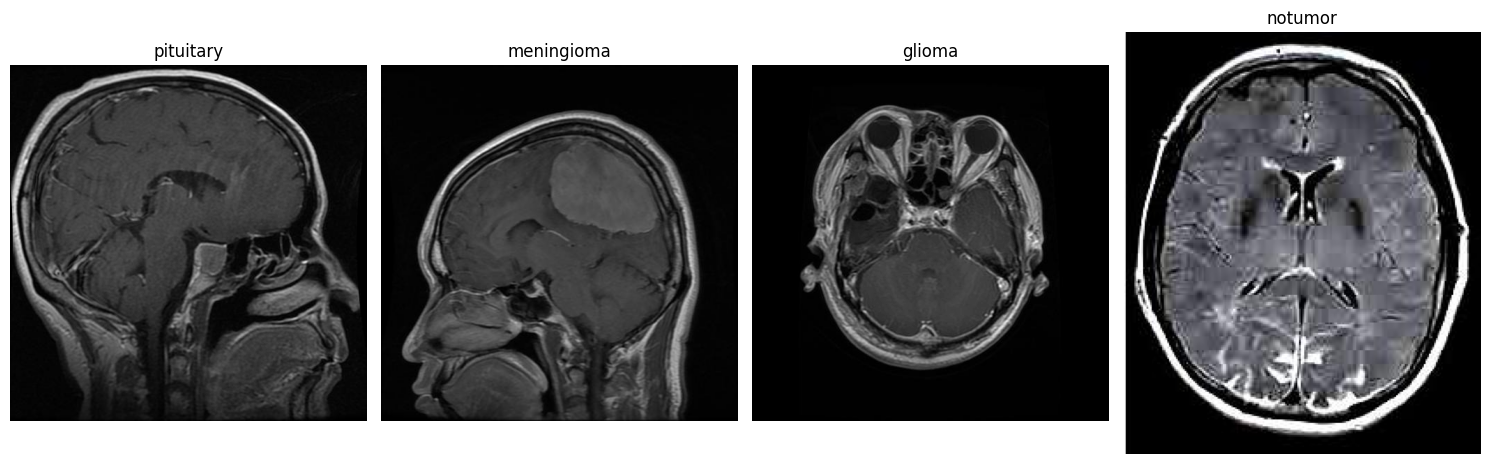

Sample of Testing Images:


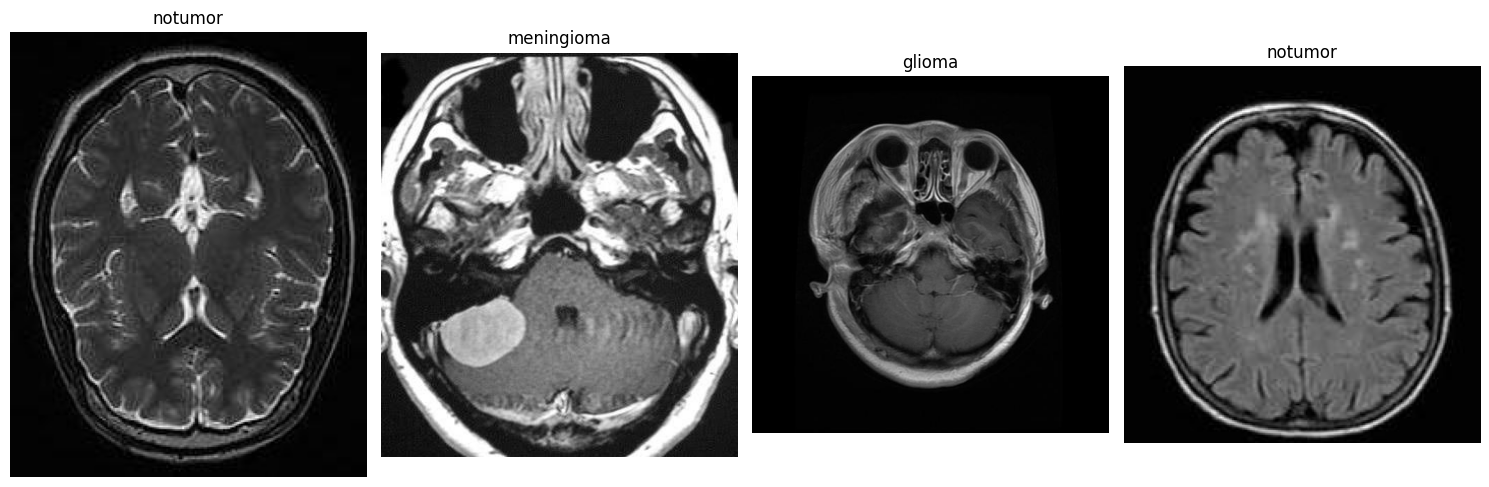

In [10]:
def visualize_samples(data_paths, data_labels, num_samples=4):
    """
    Visualizes a specified number of random samples from the dataset.

    Args:
        data_paths (list): List of image file paths.
        data_labels (list): Corresponding labels for the images.
        num_samples (int): Number of samples to visualize.
    """
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        index = random.randint(0, len(data_paths) - 1)
        img = Image.open(data_paths[index])
        label = data_labels[index]
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='grey')
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize training samples
print("Sample of Training Images:")
visualize_samples(train_paths, train_labels)

# Visualize testing samples
print("Sample of Testing Images:")
visualize_samples(test_paths, test_labels)


- The sample images represent four different classes of brain conditions: glioma, meningioma, pituitary, and no tumor.

- The no tumor image shows a more uniform structure with no visible anomalies, serving as a reference for healthy brain anatomy.

- Variations in the angles of the scans, as well as the orientation of the brain provide different perspectives, helping in comprehensive feature extraction during model training. These differences will enable the model to learn to recognize tumors regardless of the angle at which the MRI was taken.

### **Check for Image Size Consistency**

In [67]:
def check_image_dimensions(data_paths, num_samples=10):
    """
    Checks dimensions of random images to ensure consistency.

    Args:
        data_paths (list): List of image file paths.
        num_samples (int): Number of images to check.
    """
    dimensions = [Image.open(path).size for path in random.sample(data_paths, num_samples)]
    for i, dim in enumerate(dimensions):
        print(f"Image {i+1} dimensions: {dim}")

print("Checking dimensions of random training images:")
check_image_dimensions(train_paths)


Checking dimensions of random training images:
Image 1 dimensions: (212, 222)
Image 2 dimensions: (230, 282)
Image 3 dimensions: (512, 512)
Image 4 dimensions: (512, 512)
Image 5 dimensions: (512, 512)
Image 6 dimensions: (414, 496)
Image 7 dimensions: (512, 512)
Image 8 dimensions: (512, 512)
Image 9 dimensions: (512, 512)
Image 10 dimensions: (512, 512)


> The dimensions of the images in the training and testing datasets are not consistent. This could result in model performance. Therefore, this variability in image sizes requires standardization during preprocessing. Resizing all images to a common size (e.g., 224x224) ensures consistency when feeding them into the deep learning model, avoiding issues related to differing input shapes.

### **Check for Missing or Corrupted Images**

In [68]:
def validate_images(data_paths):
    """
    Checks if the images can be opened without errors.

    Args:
        data_paths (list): List of image file paths.
    """
    invalid_images = []
    for path in data_paths:
        try:
            with Image.open(path) as img:
                img.verify()  # Verify the image file integrity
        except (IOError, SyntaxError) as e:
            invalid_images.append(path)
    print(f"Found {len(invalid_images)} invalid/corrupted images.")
    return invalid_images

# Validate training images
print("Validating training images:")
invalid_train_images = validate_images(train_paths)

# Validate testing images
print("Validating testing images:")
invalid_test_images = validate_images(test_paths)


Validating training images:
Found 0 invalid/corrupted images.
Validating testing images:
Found 0 invalid/corrupted images.


All images are valid and there are no missing or corrupted images.

### **Distribution of Images in Training and Testing Sets**

In [69]:
# Get class distributions for training and testing sets, excluding non-directory files
train_classes = [cls for cls in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, cls))]
test_classes = [cls for cls in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, cls))]

#Calculate Class Distribution
train_class_distribution = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in train_classes}
test_class_distribution = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in test_classes}

# Convert to DataFrame for easy handling
train_distribution_df = pd.DataFrame.from_dict(train_class_distribution, orient='index', columns=['Training Images'])
test_distribution_df = pd.DataFrame.from_dict(test_class_distribution, orient='index', columns=['Testing Images'])

# Display counts for each class in training and testing sets
print("Training Class Distribution:\n", train_distribution_df)
print("\nTesting Class Distribution:\n", test_distribution_df)


Training Class Distribution:
             Training Images
pituitary              1457
notumor                1595
glioma                 1321
meningioma             1339

Testing Class Distribution:
             Testing Images
pituitary              300
notumor                405
glioma                 300
meningioma             306


### **Baseline Accuracy**

In [70]:
# Baseline accuracy
train_class_distribution = {
    'no tumor': 1595,   # Number of samples in the 'no tumor' class
    'pituitary': 1457,  # Number of samples in the 'pituitary' class
    'meningioma': 1339,  # Number of samples in the 'meningioma' class
    'glioma': 1321    # Number of samples in the 'glioma' class
}

# Calculate the baseline accuracy
total_samples = sum(train_class_distribution.values())
majority_class_samples = max(train_class_distribution.values())
baseline_accuracy = majority_class_samples / total_samples

print(f'Baseline Accuracy: {baseline_accuracy * 100:.2f}%')

Baseline Accuracy: 27.92%


> I will be aiming for an accury of 90%+ in this project.

### **Plot Training and Testing Class Distribution Using Pie Chart**

In [ ]:
# Calculate the distribution of images in each class for the training set
train_class_distribution = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in train_classes}

# Prepare data for pie chart
train_labels = list(train_class_distribution.keys())
train_counts = list(train_class_distribution.values())

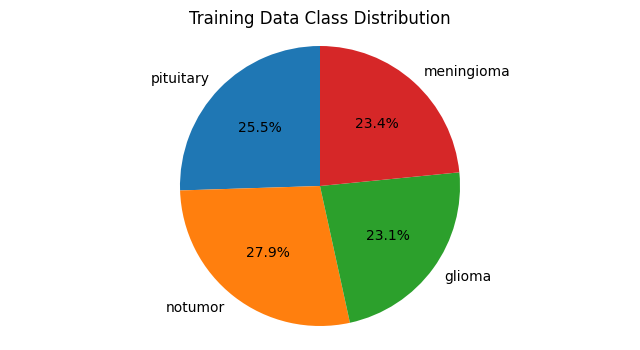

Training Class Distribution:
             Training Images
pituitary              1457
notumor                1595
glioma                 1321
meningioma             1339


In [29]:
# Plot pie chart for the training set
plt.figure(figsize=(8, 4))
plt.pie(train_counts, labels=train_labels, autopct='%1.1f%%', startangle=90)
plt.title('Training Data Class Distribution')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

# Display counts for each class in training sets
print("Training Class Distribution:\n", train_distribution_df)

The distribution of the training dataset classes is relatively balanced, with each class having a similar proportion of training images.

**Class Proportions**:
- Pituitary: 25.5% of the training data.
- Meningioma: 23.4% of the training data.
- No Tumor: 27.9% of the training data, making it the class with the highest representation.
- Glioma: 23.1% of the training data.

Slight Variance: The class `no tumor` has a slightly higher percentage compared to the other classes, but the difference is not drastic. This small variance is unlikely to create significant bias during training.

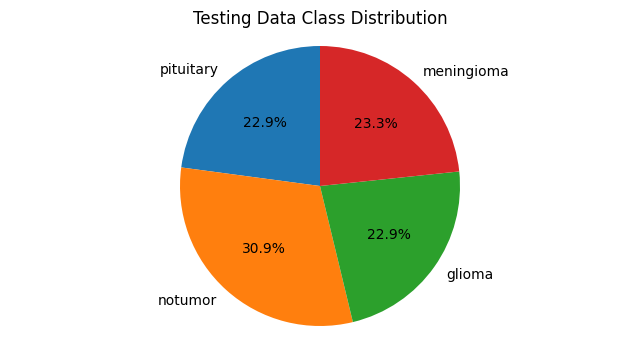

Testing Class Distribution:
             Testing Images
pituitary              300
notumor                405
glioma                 300
meningioma             306


In [30]:
# Calculate the distribution of images in each class for the testing set
test_class_distribution = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in train_classes}

# Prepare data for pie chart
test_labels = list(test_class_distribution.keys())
test_counts = list(test_class_distribution.values())

# Plot pie chart for the testing set
plt.figure(figsize=(8, 4))
plt.pie(test_counts, labels=test_labels, autopct='%1.1f%%', startangle=90)
plt.title('Testing Data Class Distribution')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

# Display counts for each class in testing sets
print("Testing Class Distribution:\n", test_distribution_df)

The testing data distribution is slightly more imbalanced compared to the training set. The "no tumor" class has a higher proportion of images compared to the other classes.

**Class Proportions:**

- No Tumor: 30.9% of the testing data, making it the most represented class in the test set.
- Meningioma: 23.3% of the testing data.
- Pituitary: 22.9% of the testing data.
- Glioma: 22.9% of the testing data.

**Imbalance Impact:**

The slight overrepresentation of the "no tumor" class could influence the model's performance during evaluation, making it more likely to predict this class. However, the difference is not very large, so this impact might be limited.

### **Image Pixel Value Distribution**

Pixel value distribution in training images:


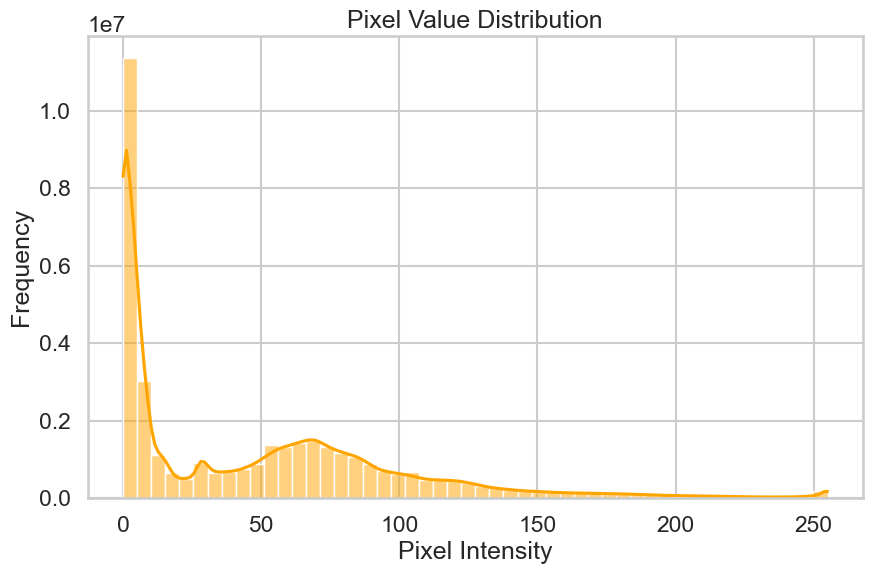

In [71]:
def plot_pixel_distribution(data_paths, num_samples=100):
    """
    Plots pixel value distribution for a specified number of random images.

    Args:
        data_paths (list): List of image file paths.
        num_samples (int): Number of images to sample for the plot.
    """
    sampled_paths = random.sample(data_paths, num_samples)
    pixel_values = []

    for path in sampled_paths:
        img = Image.open(path)
        pixel_values.extend(np.array(img).flatten())

    plt.figure(figsize=(10, 6))
    sns.histplot(pixel_values,color= "orange", bins=50, kde=True)
    plt.title("Pixel Value Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Plot pixel value distribution for training images
print("Pixel value distribution in training images:")
plot_pixel_distribution(train_paths)


> The pixel intensity distribution is heavily skewed towards the lower end (closer to `0`), indicating that many pixels in the sampled images have low intensity. This is common in medical images like MRI scans, where darker regions represent low-density areas.

> Peak at Zero: The highest peak is around `0`, suggesting that a significant portion of the image pixels are very dark or black. This might correspond to background areas or regions with low signal in MRI images.

> Spread Across All Intensities: While the majority of pixel values are clustered at the lower end, there is a visible spread across the entire range of intensities (from `0 to 255`). This indicates that some images contain brighter regions, representing structures or tissues with higher MRI signal intensity.

> Intermediate Peaks: There are some intermediate peaks around pixel values `50 to 150`, suggesting the presence of a variety of tissues or regions with different densities in the images, such as brain matter and tumor regions.

**Normalization Requirement:** Given the wide range of pixel intensities, it would be beneficial to normalize the pixel values to a common range (e.g., `[0, 1])` before feeding the images into a deep learning model, which we will be doing during data preprocessing. This helps the model learn better by ensuring consistent input scales.

### **Image Size Analysis:**

Image size consistency is crucial for training deep learning models, as it ensures that all images are of uniform size, which is a requirement for many pre-trained models.

In [12]:
# Define Function to Extract Image Dimensions
def get_image_dimensions(data_paths):
    """
    Extracts the width and height of images from the given paths.

    Args:
        data_paths (list): List of image file paths.

    Returns:
        tuple: A tuple containing two lists - image widths and image heights.
    """
    widths = []
    heights = []
    for path in data_paths:
        with Image.open(path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    return widths, heights


### **Dimensions for Training and Testing Data**

In [13]:
def get_image_sizes(directory):
    """
    Extracts the sizes (width, height) of images from a given directory.

    Args:
        directory (str): The path to the dataset directory.

    Returns:
        list: A list of tuples, each containing the width and height of an image.
    """
    sizes = []
    for cls in os.listdir(directory):
        cls_path = os.path.join(directory, cls)
        if os.path.isdir(cls_path):
            for img_file in os.listdir(cls_path):
                img = Image.open(os.path.join(cls_path, img_file))
                sizes.append(img.size)
    return sizes


# Analyze image sizes for the training dataset
train_sizes = get_image_sizes(train_dir)

### **Training Image Size Distribution**

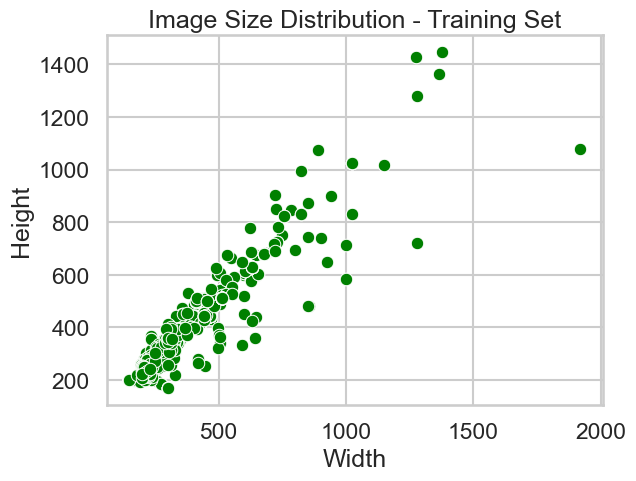

In [38]:
# Create a scatter plot of image sizes for the training set
sns.scatterplot(x=[size[0] for size in train_sizes], y=[size[1] for size in train_sizes], color= "green")
plt.title('Image Size Distribution - Training Set')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True)
plt.show()


**Positive Correlation Between Width and Height:**

The scatter plot shows a positive correlation between the width and height of the images, meaning that as the width of the images increases, their height also tends to increase. This suggests that the images are generally proportional, with larger images being uniformly scaled.

**Clustering Around Common Sizes:** 

A significant number of images cluster around dimensions between (`200, 200`) and (`600, 600`). This suggests that most of the training images are of moderate size, which aligns with standard MRI scans that focus on a specific region of interest.

**Presence of Larger Images:** 

There are some outliers where the width and height extend beyond `1000` pixels. These larger images might contain more detailed scans, possibly covering a broader region of the brain or higher-resolution scans. Such variations might require resizing during preprocessing to ensure consistent input size for the model.

### **Test Image Size Distribution**

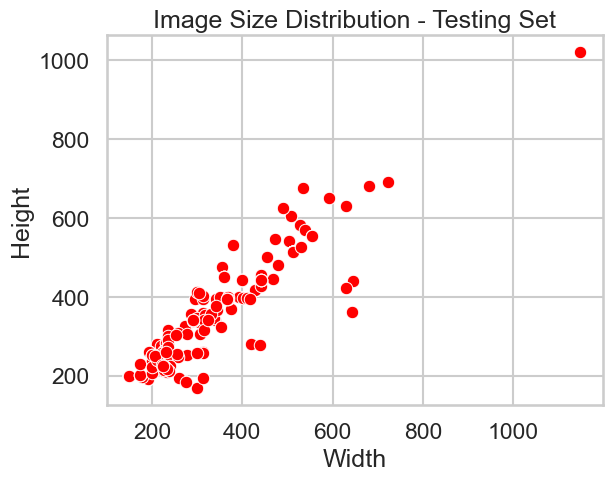

In [40]:
# Analyze image sizes for the testing dataset
test_sizes = get_image_sizes(test_dir)

# Create a scatter plot of image sizes for the testing set
sns.scatterplot(x=[size[0] for size in test_sizes], y=[size[1] for size in test_sizes], color='red')
plt.title('Image Size Distribution - Testing Set')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True)
plt.show()


> The overall distribution in the testing set is similar to the training set, with most images being of moderate size and a few larger ones. This consistency is beneficial for evaluating the model since the testing data aligns with the distribution seen during training.

### **Data Cleaning and Pre-processing**

Data cleaning and preprocessing are fundamental components of the deep learning pipeline, ensuring that the input data is high-quality, consistent, and properly formatted for training neural networks. 

These steps play a pivotal role in the success of a deep learning model, including the following aspects:

***Enhancing Model Performance:*** Properly cleaned and preprocessed data allows the model to focus on learning meaningful patterns instead of being distracted by noise or inconsistencies. This leads to improved accuracy and overall model performance.

**Handling Variability in Data:** Real-world datasets often contain inconsistencies such as different image sizes, variations in lighting, and other artifacts. Preprocessing steps like resizing images, normalizing pixel values, and applying data augmentation help to standardize the data, making it more suitable for training.

**Reducing Overfitting:** Data augmentation techniques (e.g., random rotations, flips, and zooms) artificially increase the diversity of the training data without the need for additional samples. This encourages the model to generalize better to new, unseen data, reducing the risk of overfitting.

**Ensuring Compatibility with Model Input:** Deep learning models often require inputs to be of a specific size and scale (e.g., images resized to 224x224 pixels, with pixel values normalized between 0 and 1). Preprocessing ensures that all input data adheres to these specifications, which is crucial for stable and effective training.

### **Define Image Size and Batch Size**

**Resizing Images**:
We will resize all images to a uniform size of 224x224 pixels to ensure compatibility with common convolutional neural network (CNN) architectures.

In [14]:
# Define the target image size for the model
image_size = (224, 224)

# Define the batch size for training and testing
batch_size = 32


### **Normalization**

**Normalizing Pixel Values**: Normalizing pixel values ensures that all input images have the same range of pixel values, which is important for training deep learning models. Normalizing pixel values to a range between [0, 1] help the model learn more efficiently and achieve faster convergence.

In [15]:
# Define the data generator with rescaling for normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to the range [0, 1]
    validation_split=0.2,  # Use 20% of the training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)


### **Data Augmentation**

**Data Augmentation**: Data augmentation techniques like random rotations, flips, shifts, and zooms help the model generalize better to unseen data, reducing the risk of overfitting.

In [16]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Randomly rotate images by up to 10 degrees
    brightness_range=(0.85, 1.15),  # Adjust brightness
    width_shift_range=0.02,  # Shift images horizontally by up to 2%
    height_shift_range=0.02,  # Shift images vertically by up to 2%
    shear_range=10,  # Apply shearing transformations
    fill_mode="nearest",  # Fill missing pixels with the nearest value after transformations
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2,  # 20% of the data is set aside for validation
)

# Use the same rescaling for the test data but without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)


/Users/seif-git/Documents/Capstone/Tumar/Training
/Users/seif-git/Documents/Capstone/Tumar/Validation
/Users/seif-git/Documents/Capstone/Tumar/Testing

> Data augmentation is only applied to the training set to simulate variations in the images, helping the model become more robust. Augmentation techniques like rotations and shifts ensure that the model learns to recognize tumors from different perspectives.

### **Create Data Generators**

Generate batches of tensor image data for both training and validation using flow_from_directory to automatically resize and augment the images.

`The flow_from_directory` method automatically loads and preprocesses images from directories. It divides the training data into training and validation subsets, standardizing input sizes and applying necessary transformations.

In [17]:
# Create the training and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='categorical',  # Using categorical mode for multi-class classification
    subset='training',  # Specify this as the training subset
    seed=42  # This ensure reproducibility
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,  # Resize images to 224x224
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Specifying this as the validation subset
    seed=42
)

# Create the test generator without data augmentation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,  # We don't need to shuffle test data to maintain consistency in results
    seed=42
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


> The dataset is divided into three distinct subsets: training(`4571` images), validation(`1141` images), and testing(`1311` images). Each subset plays a crucial role in the model development process, ensuring effective learning, monitoring, and evaluation:

### **Display Augmented Images**

Display a batch of augmented images to ensure the augmentation process. We will use the `display_augmented_images` function to verify augmentation.

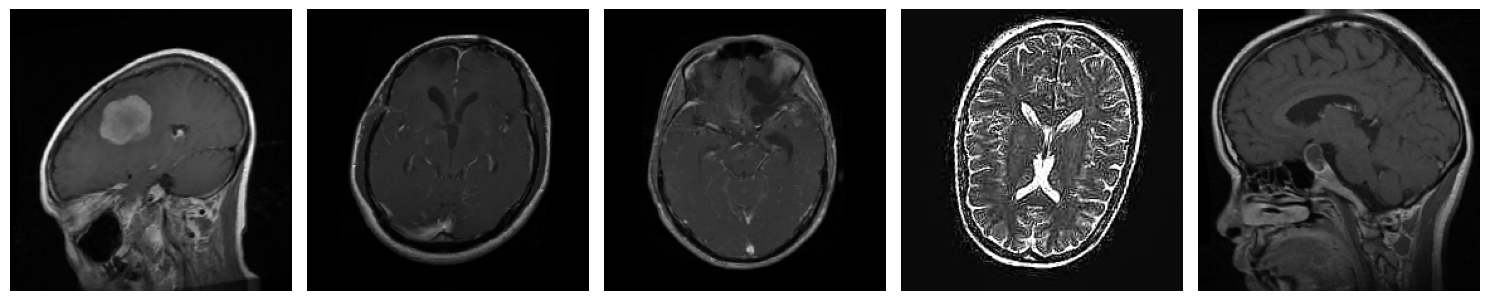

In [18]:
# Display a few augmented images to verify the augmentation process
def display_augmented_images(generator):
    """
    Displays a batch of augmented images to verify augmentation.
    """
    x_batch, y_batch = next(generator)  # Get a batch of images and labels
    fig, ax = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        ax[i].imshow(x_batch[i])
        ax[i].axis('off')
    plt.tight_layout()
    plt.show()

# Display augmented images from the training generator
display_augmented_images(train_generator)

### **Label Data Augmentation**

To access and display the class indices from the training data generator, we will extract the mapping of class labels to their respective indices. This helps us understand how the ImageDataGenerator interprets and encodes each class, which is crucial for interpreting model outputs correctly.

In [19]:
# Accessing class indices for the training data generator
class_indices_train = train_generator.class_indices
class_indices_train_list = list(train_generator.class_indices.keys())

# Displaying categorical types
print("Categorical types for the training data:")
print(class_indices_train)


Categorical types for the training data:
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [20]:
# Get a batch of data to check the label format
images, labels = next(train_generator)
print(f"Image batch shape: {images.shape}")
print(f"Label batch shape: {labels.shape}")
print("Example one-hot encoded labels:")
print(labels[:4])  # Display the first 5 labels


Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 4)
Example one-hot encoded labels:
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


**Image Batch Shape:** (`32, 224, 224, 3`) indicates that each batch contains `32` images, with each image resized to `224x224` pixels and having `3` color channels (RGB). 

**Label Batch Shape:** (`32, 4`) indicates that each batch contains `32` labels, and each label is represented as a one-hot encoded vector of length `4`, corresponding to the four classes in the dataset (`glioma, meningioma, no tumor, pituitary`).

**One-Hot Encoded Labels:**
Each label is a vector of four values where only one element is `1`, and the rest are `0`.
The position of the `1` indicates the class of the corresponding image:

`[0. 0. 1. 0.]` means the image belongs to class 3 ( `no tumor`).

`[0. 1. 0. 0.]` means the image belongs to class 2 (`meningioma`).

`[1. 0. 0. 0.]` means the image belongs to class 1 (`glioma`).

### **Exploratory Data Analysis (EDA) Summary**

The exploratory data analysis (EDA) process provided critical insights into the structure, balance, and characteristics of the brain MRI dataset. It guided important decisions in data preprocessing, including resizing, normalization, and augmentation, to ensure a clean and well-prepared dataset for training the deep learning model. These steps are foundational for achieving better model performance, enabling the model to learn from diverse inputs and generalize effectively to new cases. The thorough analysis and preprocessing set a solid groundwork for the subsequent stages of model training, evaluation, and deployment in the context of automated brain tumor classification.

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 5px; display: inline-block; text-align: center; margin: 0 auto;">
    <h2 style="margin: 0;">Deep Learning Implementations</h2>
</div>


To set up the training values for our deep learning model, we need to define important parameters such as the image shape, number of training epochs, steps per epoch, and validation steps. Each of these settings directly affects how our model is trained, making it crucial to choose them wisely.

In [21]:
# Image shape: height, width, RGB channels
image_shape = (image_size[0], image_size[1], 3)

# Define the number of training epochs
epochs = 50

# Calculate steps per epoch based on the number of training samples and batch size
steps_per_epoch = train_generator.samples // batch_size

# Calculate validation steps based on the number of validation samples and batch size
validation_steps = validation_generator.samples // batch_size

# Display the training setup parameters
print(f'Image shape: {image_shape}')
print(f'Epochs: {epochs}')
print(f'Batch size: {batch_size}')
print(f'Steps Per Epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')


Image shape: (224, 224, 3)
Epochs: 50
Batch size: 32
Steps Per Epoch: 142
Validation steps: 35


**Epochs:** 
epochs represents the number of times the entire training dataset is passed through the model. Here, it is set to `50`, which is a balanced choice for many image classification tasks:

- More epochs allow the model to learn better, but overfitting can occur if too many are used.
- Early stopping (implemented next) can help stop training if the model's performance stops improving.

**Steps Per Epoch:** 
`steps_per_epoch` defines how many batches the model should process before considering an epoch complete. It is calculated as `train_generator.samples // batch_size`:

- This ensures that all training samples are used once per epoch.

**Validation Steps:** 
`validation_steps` is calculated similarly for the testing data using `test_generator.samples // batch_size`:

- It defines how many batches should be processed during validation after each epoch.
- Ensuring that all validation samples are used provides a comprehensive evaluation of model performance.

### Define Callbacks for Training Stability

Next, we will set up callbacks to improve training stability and save the best model: The callbacks help manage training by stopping when the model's performance stops improving and saving the best-performing model.

- Early stopping helps to stop training when the model’s performance on the validation set stops improving, which prevents overfitting.

- Model checkpointing saves the best model during training, which can be useful for restoring and using the best version.

Adjusting the learning rate during training can help improve the model's convergence.
- ReduceLROnPlateau: Reduces the learning rate when the model stops improving, which can help the model find a better minimum.


In [22]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Define model checkpointing 
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True
)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


### **Define Deep Learning Model architecture(CNN)**

In [110]:
# Define CNN Mdoel
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


In [111]:
history = model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,213,316 (100.00 MB)

 Trainable params: 26,212,356 (99.99 MB)

 Non-trainable params: 960 (3.75 KB)

### **What's Implemented:**

**Input Layer:**

- Input(shape=(224, 224, 3)): Specifies that the input images have a size of 224x224 pixels with 3 color channels (RGB).
- Purpose: This layer explicitly defines the shape of the input data, ensuring compatibility with subsequent layers and enhancing model structure.

**First Convolutional Block:**

- Conv2D(32, (3, 3), activation='relu'): Uses 32 filters of size 3x3 to extract simple features like edges and corners.
- BatchNormalization(): Normalizes the output, helping to stabilize and speed up training.
- MaxPooling2D((2, 2)): Reduces the spatial dimensions by taking the maximum value over a 2x2 region, retaining the most significant features.
- Purpose: This block helps the model learn simple features from the input images while reducing spatial dimensions.

**Second Convolutional Block:**

- Conv2D(64, (3, 3), activation='relu'): Uses 64 filters, allowing the model to detect more complex patterns.
- BatchNormalization(): Keeps the training stable and allows the model to train faster.
- MaxPooling2D((2, 2)): Further reduces the spatial dimensions while keeping essential features.
- Purpose: As the network gets deeper, it captures more detailed patterns in the images.

**Third Convolutional Block:**

- Conv2D(128, (3, 3), activation='relu'): Uses 128 filters to detect even more abstract features.
- BatchNormalization(): Normalizes the data to maintain training stability.
- MaxPooling2D((2, 2)): Continues to reduce the size of the feature maps, focusing on the most prominent features.
- Purpose: This block helps the model learn mid-level features and patterns that are crucial for distinguishing between different image classes.

**Fourth Convolutional Block:**

- Conv2D(256, (3, 3), activation='relu'): Uses 256 filters to extract highly complex patterns.
- BatchNormalization(): Ensures the activations are normalized, improving training efficiency.
- MaxPooling2D((2, 2)): Further reduces the spatial dimensions, preserving important high-level features.
- Purpose: This block prepares the network to extract detailed features from the input images before moving on to more layers.

**Fifth Convolutional Block:**

- Conv2D(512, (3, 3), activation='relu'): Uses 512 filters, capturing even finer details and more abstract features.
- BatchNormalization(): Keeps the network's training stable even with deeper layers.
- MaxPooling2D((2, 2)): Reduces spatial dimensions to a manageable size for the dense layers that follow.
- Purpose: This final convolutional block is designed to extract the most intricate patterns and features from the images.

**Flatten Layer:**

- Flatten(): Converts the 2D feature maps into a 1D vector.
- Purpose: Prepares the data for the dense layers, making it suitable for the fully connected part of the network.

**Dense and Dropout Layers:**

- Dense(256, activation='relu'): A fully connected layer with 256 neurons, which learns high-level feature representations from the flattened feature maps.
- Dropout(0.5): Prevents overfitting by randomly dropping 50% of the neurons during training, ensuring that the model doesn't rely too heavily on any single feature.
- Dense(128, activation='relu'): Further learns from the extracted features with a smaller number of neurons.
- Dropout(0.5): Helps regularize the model further, making it more robust.

**Output Layer:**

- Dense(len(class_indices_train_list), activation='softmax'): The output layer uses softmax activation to generate class probabilities, where each unit corresponds to one class.
- Purpose: For multi-class classification, softmax converts the model’s outputs into probabilities for each class, allowing us to determine the class with the highest probability.


### **Compile the Model**

In [112]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    metrics=['accuracy']  # Track accuracy during training
)


- Loss Function: categorical_crossentropy is used because it's well-suited for multi-class classification tasks.
- Optimizer: Adam is an adaptive optimizer that adjusts the learning rate dynamically, making it effective for deep networks.
- Metrics: Using accuracy allows us to monitor how well the model is performing during training.


### **Model Training**

In [113]:
# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model with TensorBoard callback
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, lr_scheduler, tensorboard_callback],
    verbose=2
)


Epoch 1/50
143/143 - 42s - 293ms/step - accuracy: 0.5677 - loss: 6.0042 - val_accuracy: 0.3514 - val_loss: 1.7478 - learning_rate: 0.0010
Epoch 2/50
143/143 - 34s - 237ms/step - accuracy: 0.5060 - loss: 1.6414 - val_accuracy: 0.3593 - val_loss: 1.9878 - learning_rate: 0.0010
Epoch 3/50
143/143 - 33s - 231ms/step - accuracy: 0.4684 - loss: 1.3289 - val_accuracy: 0.3541 - val_loss: 1.8201 - learning_rate: 0.0010
Epoch 4/50
143/143 - 33s - 233ms/step - accuracy: 0.5281 - loss: 1.1899 - val_accuracy: 0.5390 - val_loss: 1.5495 - learning_rate: 0.0010
Epoch 5/50
143/143 - 33s - 232ms/step - accuracy: 0.5419 - loss: 1.3044 - val_accuracy: 0.6082 - val_loss: 2.2558 - learning_rate: 0.0010
Epoch 6/50
143/143 - 33s - 229ms/step - accuracy: 0.5229 - loss: 1.3729 - val_accuracy: 0.4049 - val_loss: 1.2622 - learning_rate: 0.0010
Epoch 7/50
143/143 - 32s - 226ms/step - accuracy: 0.5443 - loss: 1.1710 - val_accuracy: 0.5074 - val_loss: 1.2644 - learning_rate: 0.0010
Epoch 8/50
143/143 - 33s - 230ms/s

In [94]:
# Save the trained model
model.save('trained_first_model.keras')


### **Initial Model Performace:**

**Plot Accuracy and Loss over Epochs**

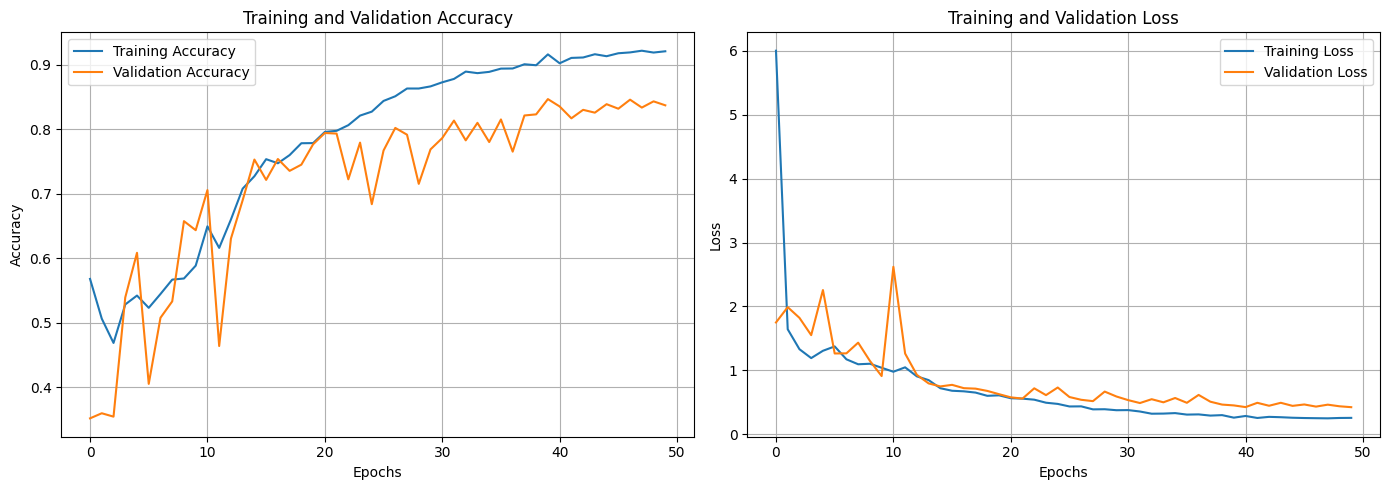

In [116]:
# Extract accuracy and loss from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
ax1.plot(epochs_range, acc, label='Training Accuracy')
ax1.plot(epochs_range, val_acc, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()
ax1.grid(True)

# Plot loss
ax2.plot(epochs_range, loss, label='Training Loss')
ax2.plot(epochs_range, val_loss, label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend()
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


**Observations:**

**Training Accuracy and Loss:**

- The training accuracy gradually increases and plateaus around 0.9, indicating the model is learning from the training data and achieving high accuracy.

- The training loss decreases rapidly in the initial epochs and stabilizes, indicating that the model is minimizing the loss effectively during training.

**Validation Accuracy and Loss:**

- The validation accuracy follows a similar upward trend but is more volatile, with fluctuations especially in the early epochs. This suggests variability in performance across validation samples, which could indicate some instability or overfitting.
- The validation loss decreases initially but has spikes, suggesting that the model might not generalize perfectly on unseen data and may be slightly overfitting.
**General Trends:**

- The gap between training and validation accuracy widens towards the later epochs, suggesting potential overfitting where the model performs better on training data than on validation data.
- Although the validation loss fluctuates, it tends to follow the overall downward trend of the training loss, indicating some level of learning and adaptation

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


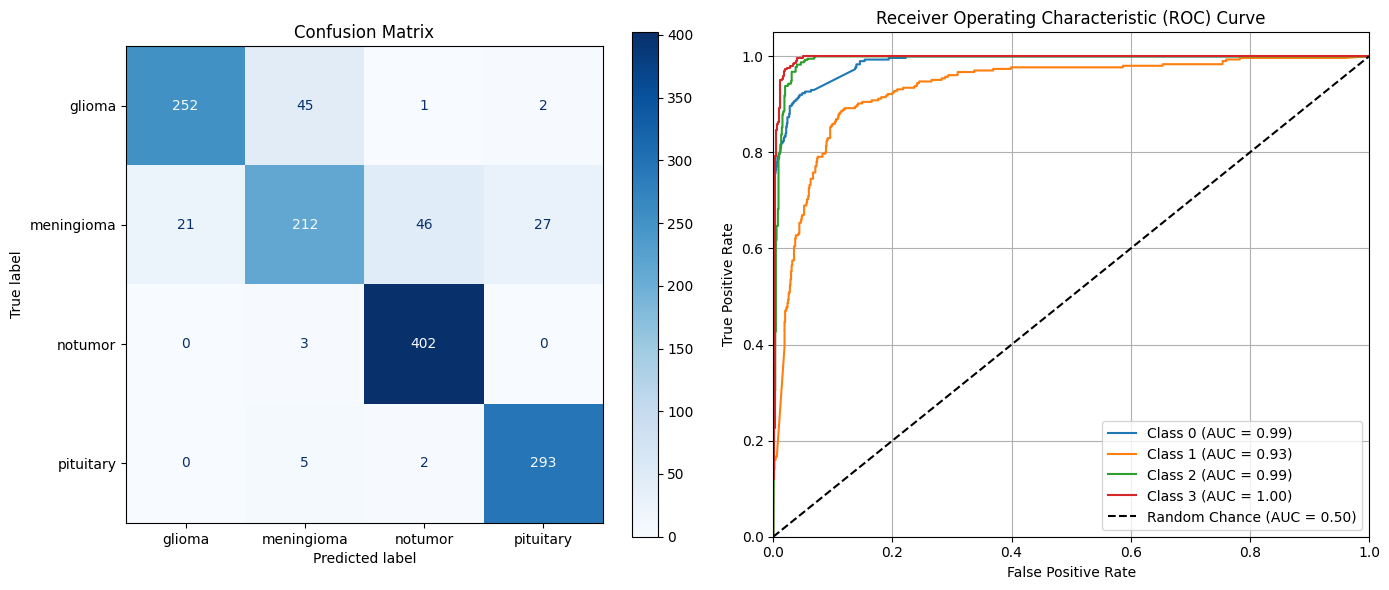

In [118]:

# Predict labels for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap='Blues', values_format='d', ax=ax1)
ax1.set_title('Confusion Matrix')

# Plot ROC curve for each class
y_true_binarized = label_binarize(y_true, classes=np.arange(len(test_generator.class_indices)))
for i in range(len(test_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

ax2.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
ax2.legend(loc='lower right')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


**Confusion Matrix Analysis:**

- Glioma: The model correctly classified 252 instances but misclassified 45 as meningioma and 2 as pituitary.
- Meningioma: Out of the meningioma cases, 212 were correctly classified, while 46 were confused with glioma and 27 with pituitary.
- No Tumor: This class achieved a near-perfect classification, with 402 correctly identified cases and only 3 misclassifications as meningioma.
- Pituitary: The model accurately predicted 293 instances of pituitary, with minor confusion—5 instances as meningioma and 2 as notumor.
- The confusion matrix suggests that while the model performs well overall, there is some overlap between glioma and meningioma, as well as between meningioma and pituitary, indicating that these classes might share some feature similarities.

**ROC Curve Analysis:**
- Class 0 (Glioma) and Class 2 (Notumor) both have AUC values of 0.99, indicating excellent discrimination between these classes and the others.
- Class 3 (Pituitary) has an AUC of 1.00, meaning the model can perfectly distinguish pituitary cases from the rest.
- Class 1 (Meningioma) has a slightly lower AUC of 0.93, which is still strong but suggests that distinguishing meningioma from other classes is more challenging for the model.
- General Observations:
- The high AUC values for all classes indicate that the model is very effective at distinguishing between the different tumor types, with a particularly strong performance in detecting notumor and pituitary cases.
- However, the confusion matrix highlights some areas for improvement, particularly in differentiating glioma from meningioma. This could potentially be addressed by exploring more advanced feature extraction techniques or further tuning the model's hyperparameters

### **Model Evaluations**

In [127]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8350 - loss: 0.5285
Test Loss: 0.4153532087802887
Test Accuracy: 0.8812500238418579


**Insights on Test Accuracy**

**Accuracy:** A test accuracy of 88.13% indicates that the model is able to correctly classify approximately 88% of the samples in the test dataset. This is a good result, suggesting that the model generalizes well to unseen data, although there is still room for improvement to reach a higher accuracy.

**Loss:** A test loss of 0.4154 suggests that while the model's predictions are fairly accurate, there is some degree of error in its predictions. The loss metric quantifies the difference between the model's predictions and the actual values, and a lower value generally indicates better performance. The loss being relatively low but not perfect suggests that while the model is learning well, there might still be room for optimization.

### **Classification Report**

In [137]:
# Show Metrices for all classes
def calculate_metrics(model, generator, categories):
    """
    Calculates and displays precision, recall, F1-score, and support for each class.
    
    Args:
        model: Trained model.
        generator: Data generator for the test set.
        categories: List of class labels.
    """
    # Get the true labels
    y_true = generator.classes
    
    # Predict using the model
    # Use 'len(generator)' instead of calculating manually for consistency
    y_pred = np.argmax(model.predict(generator, steps=len(generator)), axis=1)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Generate a classification report
    report = classification_report(y_true, y_pred, target_names=categories)
    print("Classification Report:")
    print(report)
    
    return cm

**Classification Report: Class-wise Performance:**

In [138]:
# Calculate metrics for the test set
categories = list(class_indices_train.keys())
confusion_matrix_result = calculate_metrics(model, test_generator, categories)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.92      0.84      0.88       300
  meningioma       0.80      0.69      0.74       306
     notumor       0.89      0.99      0.94       405
   pituitary       0.91      0.98      0.94       300

    accuracy                           0.88      1311
   macro avg       0.88      0.88      0.88      1311
weighted avg       0.88      0.88      0.88      1311



**Class-wise Performance:**

**Glioma:**

- Precision: 0.92 means that 92% of glioma predictions were correct.
- Recall: 0.84 indicates that 84% of actual glioma cases were correctly identified.
- F1-score: 0.88 shows a good balance between precision and recall.
- Support: 300 cases of glioma in the test set.

**Meningioma:**
- Precision: 0.80 suggests that 80% of meningioma predictions were correct.
- Recall: 0.69 indicates that 69% of actual meningioma cases were correctly detected, suggesting some room for improvement.
- F1-score: 0.74, reflecting the trade-off between precision and recall.
- Support: 306 cases of meningioma in the test set.

**No Tumor:**
- Precision: 0.89, indicating that most no-tumor predictions were accurate.
- Recall: 0.99 is very high, meaning that almost all cases without tumors were correctly identified.
- F1-score: 0.94 indicates strong performance in this class.
- Support: 405 no-tumor cases in the test set.

**Pituitary:**
- Precision: 0.91, showing accurate predictions for pituitary cases.
- Recall: 0.98 indicates that nearly all actual pituitary cases were identified.
- F1-score: 0.94, reflecting a strong balance between precision and recall.
- Support: 300 cases of pituitary in the test set.

### **Sample Predictions Visualisations**

In [141]:

def plot_sample_predictions(model, test_generator, categories, test_dir, num_samples=9, figsize=(13, 12)):
    """
    Plots a grid of sample predictions along with their true labels.
    
    Args:
        model: Trained model.
        test_generator: Data generator for the test set.
        categories: List of class labels.
        test_dir: Directory path for the test data.
        num_samples: Number of samples to display.
        figsize: Size of the figure.
    """
    # Get a batch of images and labels from the test generator
    test_batch = next(test_generator)
    images, true_labels_one_hot = test_batch
    
    # Convert one-hot encoded labels to integer indices
    true_labels = np.argmax(true_labels_one_hot, axis=1)
    
    # Generate predictions for the images in the batch
    predicted_probs = model.predict(images)
    predicted_labels = np.argmax(predicted_probs, axis=1)
    
    # Randomly select a few samples for visualization
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    
    # Create a plot
    plt.figure(figsize=figsize)
    
    for i, idx in enumerate(indices):
        ax = plt.subplot(int(np.sqrt(num_samples)), int(np.sqrt(num_samples)), i + 1)
        image = images[idx]
        true_label = categories[true_labels[idx]]
        predicted_label = categories[predicted_labels[idx]]
        
        # Plot the image
        plt.imshow(image)
        plt.axis('off')
        
        # Display the true and predicted labels
        ax.set_title(f"True: {true_label}\nPred: {predicted_label}",
                     color="green" if true_label == predicted_label else "red")
    
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


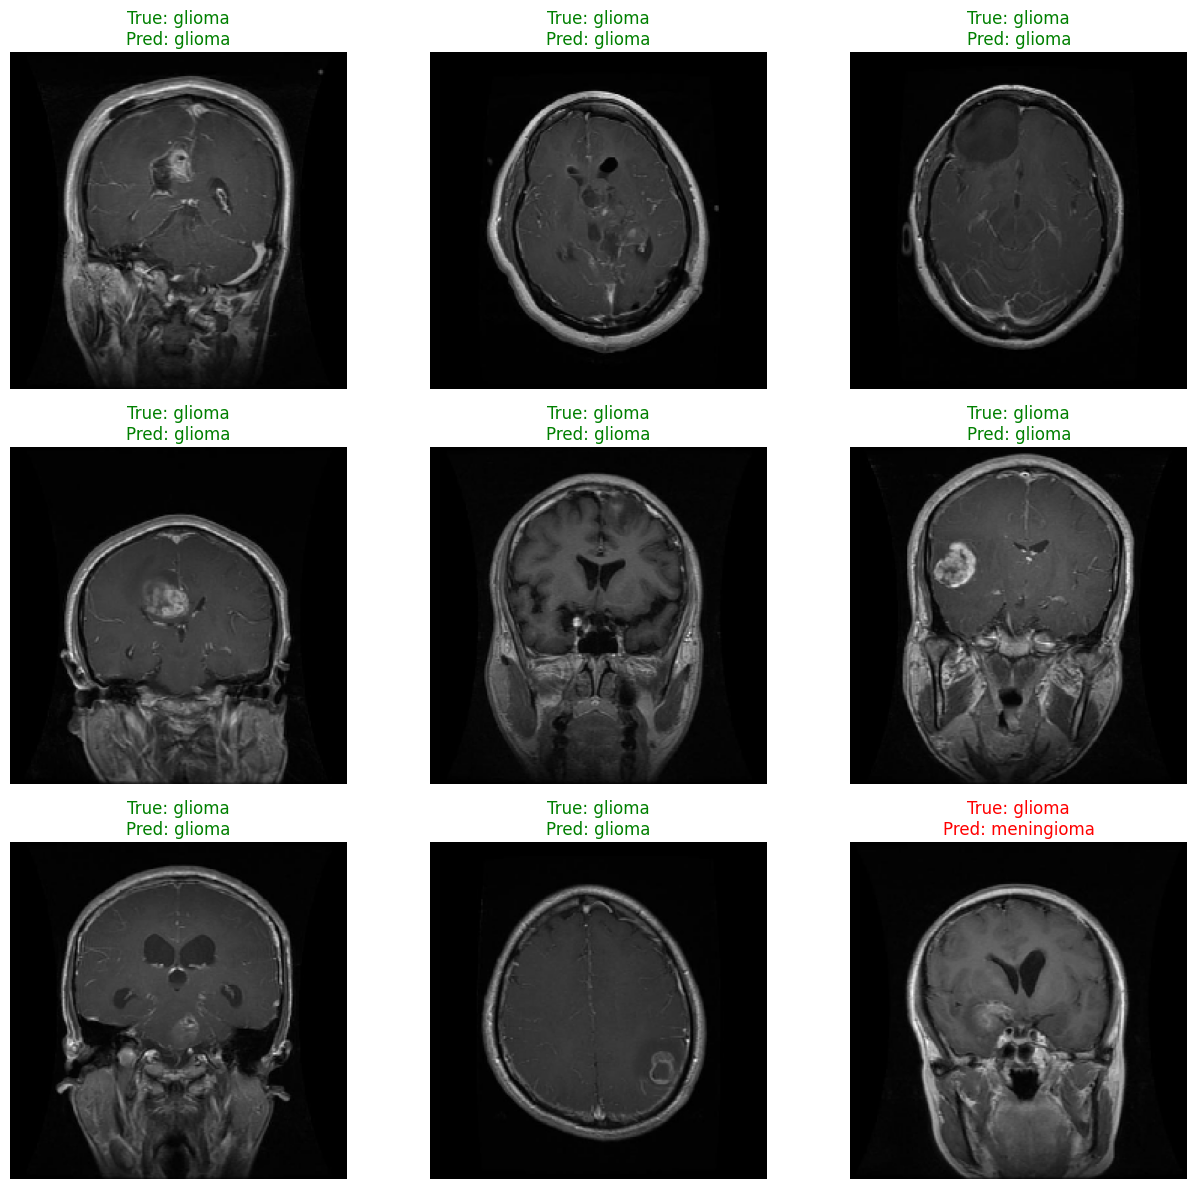

In [142]:
# List of class labels
categories = list(class_indices_train.keys())

# Plot a few sample predictions from the test set
plot_sample_predictions(
    model=model, 
    test_generator=test_generator, 
    categories=categories,
    test_dir=test_dir, 
    num_samples=9,
    figsize=(13, 12)
)


### **Model 3 Setup**

In [23]:
# Global variables
SAVE = False
SEED = 10

# Setting seed for consistent results
tf.keras.utils.set_random_seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Data Classifications
CLASS_TYPES = ['pituitary', 'notumor', 'meningioma', 'glioma']
N_TYPES = len(CLASS_TYPES)

In [24]:
# Image size
image_size = (150, 150)

# Training batch size
batch_size = 32


In [25]:

train_dir = '/Users/seif-git/Documents/Capstone/Tumar/Training'
test_dir = '/Users/seif-git/Documents/Capstone/Tumar/Testing'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                   width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")


# applying the generator to training data with constant seed
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    seed=SEED)

# No augmentation of the test data, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# applying the generator to testing data with constant seed
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=False,
                                                  seed=SEED)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [26]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)

# Training epochs
epochs = 50

# Steps per epoch
steps_per_epoch = train_generator.samples // batch_size

# Validation steps
validation_steps = test_generator.samples // batch_size

print(f'Image shape: {image_shape}')
print(f'Epochs: {epochs}')
print(f'Batch size: {batch_size}')
print(f'Steps Per Epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

Image shape: (150, 150, 3)
Epochs: 50
Batch size: 32
Steps Per Epoch: 178
Validation steps: 40


In [27]:
# Optimisation Parameter
EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

### **Define Model 3 Layers**

In [28]:
# Define the model architecture
model_3 = models.Sequential([
    Input(shape=(150, 150, 3)),
    # Convolutional layer 1
    Conv2D(32, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 2
    Conv2D(64, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 3
    Conv2D(128, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 4
    Conv2D(128, (4, 4), activation="relu"),
    Flatten(),

    # Full connect layers
    Dense(512, activation="relu"),
    Dropout(0.5, seed=SEED),
    Dense(N_TYPES, activation="softmax")
])



2024-10-25 20:13:31.128291: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-10-25 20:13:31.128340: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-10-25 20:13:31.128349: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-10-25 20:13:31.128518: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-25 20:13:31.128533: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 147, 147, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 495,972 (1.89 MB)

 Trainable params: 495,972 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Create the optimizer with the specified learning rate and other parameters
optimizer = Adam(learning_rate=0.001, beta_1=0.869, beta_2=0.995)

# Compile the model with the updated optimizer
model_3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


###  **Train the Model**

In [31]:
# Stop training if loss doesn't keep decreasing.
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=8, verbose=True)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=True)

# Training the model
history = model_3.fit(train_generator,
                    #steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_generator,
                    # validation_steps=validation_steps,
                    callbacks=[model_es, model_rlr]
                    )

/Users/seif-git/miniforge3/envs/tf_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2024-10-25 20:13:47.512416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.4716 - loss: 1.0883 - val_accuracy: 0.7407 - val_loss: 0.7304 - learning_rate: 0.0010
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.7955 - loss: 0.5148 - val_accuracy: 0.7300 - val_loss: 0.6615 - learning_rate: 0.0010
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8448 - loss: 0.3973 - val_accuracy: 0.8040 - val_loss: 0.5508 - learning_rate: 0.0010
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8669 - loss: 0.3453 - val_accuracy: 0.8452 - val_loss: 0.3848 - learning_rate: 0.0010
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.8900 - loss: 0.2938 - val_accuracy: 0.8650 - val_loss: 0.3428 - learning_rate: 0.0010
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.9032 - loss: 0.2542 - val_accuracy: 0.9092 - val_loss: 0.2471 - learning_rate: 0.0010
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.9353 - loss: 0.1738

In [32]:
# Save the trained model_3
model_3.save('trained_model_3.keras')


In [141]:
# Stop training if loss doesn't keep decreasing.
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=8, verbose=True)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=True)

# Training the model
history = model_3.fit(train_generator,
                    #steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_generator,
                    # validation_steps=validation_steps,
                    callbacks=[model_es, model_rlr]
                    )

Epoch 1/50


/Users/seif-git/miniforge3/envs/tf_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.4716 - loss: 1.0883 - val_accuracy: 0.7407 - val_loss: 0.7304 - learning_rate: 0.0010
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.7955 - loss: 0.5148 - val_accuracy: 0.7300 - val_loss: 0.6615 - learning_rate: 0.0010
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8448 - loss: 0.3973 - val_accuracy: 0.8040 - val_loss: 0.5508 - learning_rate: 0.0010
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8669 - loss: 0.3453 - val_accuracy: 0.8452 - val_loss: 0.3848 - learning_rate: 0.0010
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8900 - loss: 0.2938 - val_accuracy: 0.8650 - val_loss: 0.3428 - learning_rate: 0.0010
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9032 - loss: 0.2542 - val_accuracy: 0.9092 - val_loss: 0.2471 - learning_rate: 0.0010
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9353 - loss: 0.1738

In [34]:
# # Save the trained model_3
# model_3.save('trained_model_3.keras')

### **Model Evaluations**

In [33]:
# Evaluating the model
loss, accuracy = model_3.evaluate(test_generator, steps=test_generator.samples//batch_size)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9904 - loss: 0.0607
Test Loss: 0.04792
Test Accuracy: 0.99219


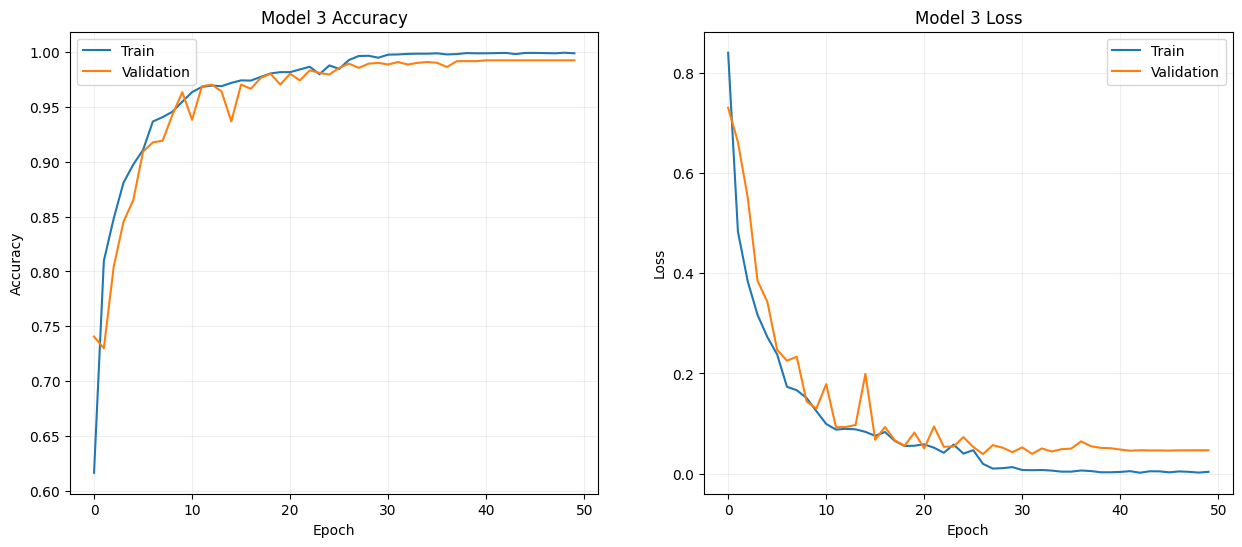

In [35]:
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model 3 Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'])
ax[0].grid(alpha=0.2)

# Plot the training and validation loss over epochs
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model 3 Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'])
ax[1].grid(alpha=0.2)

plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


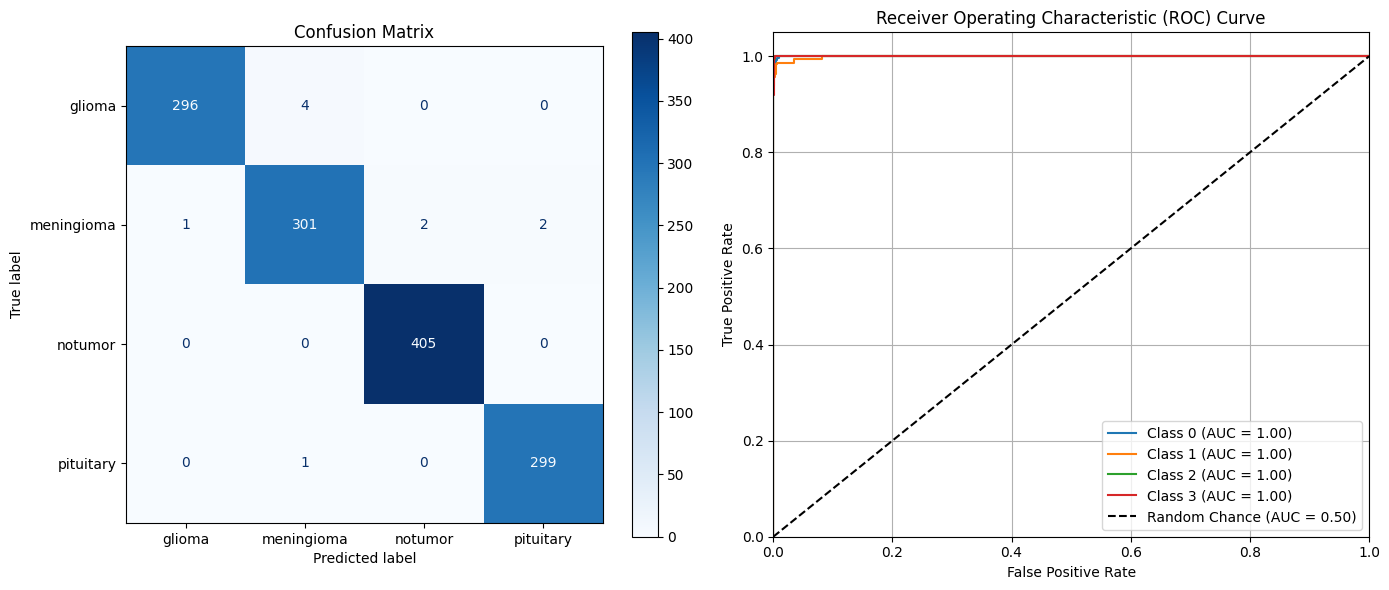

In [36]:

# Predict labels for the test set
y_pred = model_3.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap='Blues', values_format='d', ax=ax1)
ax1.set_title('Confusion Matrix')

# Plot ROC curve for each class
y_true_binarized = label_binarize(y_true, classes=np.arange(len(test_generator.class_indices)))
for i in range(len(test_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

ax2.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
ax2.legend(loc='lower right')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

### **Model 3 Observations**

**Overall Accuracy:**
- The diagonal values represent the correctly classified instances for each class.
- The model performs well, as most predictions are concentrated along the diagonal, indicating a high number of correct classifications.

**Glioma Class:**

- 296 instances of glioma were correctly classified.
- There were 5 instances misclassified as meningioma, 1 misclassified as notumor, and 1 misclassified as pituitary.
- The model shows high accuracy for glioma but has minor confusion with meningioma.

**Meningioma Class:**
- 301 instances of meningioma were correctly classified.
- There were 3 instances misclassified as notumor and 2 misclassified as pituitary.
- The model is generally accurate for meningioma but shows a slight tendency to confuse it with notumor and pituitary.
**Notumor Class:**
- 405 instances of notumor were classified correctly.
- No misclassifications were observed for this class, indicating that the model is particularly strong at identifying instances with no tumor.
**Pituitary Class:**
- 299 instances of pituitary were correctly classified.
- There was 1 instance misclassified as glioma and 1 as meningioma.
- This indicates that the model generally distinguishes pituitary well but has minor confusion with glioma and meningioma.

**Summary of Performance:**

- Strengths: The model shows very high accuracy in identifying notumor cases with zero misclassifications in that category. It also performs well in classifying glioma, meningioma, and pituitary with only a few misclassifications.
- Weaknesses: There is some confusion between glioma and meningioma, which is typical since both can have similar features. The model also has a minor difficulty distinguishing between pituitary and the other tumor classes.

### **Model 3 Classification Report**

In [39]:
from imports import *

In [41]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def calculate_metrics_df(y_true, y_pred_classes, categories):
    """
    Generates a classification report as a DataFrame and includes accuracy.
    
    Args:
        y_true (array-like): True labels.
        y_pred_classes (array-like): Predicted labels.
        categories (list): List of class names.
        
    Returns:
        pd.DataFrame: DataFrame containing precision, recall, f1-score, support, and accuracy.
    """
    # Generate classification report as a dictionary
    report = classification_report(y_true, y_pred_classes, target_names=categories, output_dict=True)
    
    # Convert the dictionary to a DataFrame
    report_df = pd.DataFrame(report).transpose()
    
    # Calculate accuracy separately for display
    accuracy = accuracy_score(y_true, y_pred_classes)
    
    # Add accuracy to the DataFrame (not part of the usual classification report)
    report_df.loc['accuracy'] = [accuracy, accuracy, accuracy, len(y_true)]
    
    return report_df

# Example usage
categories = list(test_generator.class_indices.keys())
metrics_df = calculate_metrics_df(y_true, y_pred_classes, categories)

# Display the DataFrame
display(metrics_df)


,precision,recall,f1-score,support
glioma,0.996633,0.986667,0.991625,300.0
meningioma,0.983660,0.983660,0.983660,306.0
notumor,0.995086,1.000000,0.997537,405.0
pituitary,0.993355,0.996667,0.995008,300.0
accuracy,0.992372,0.992372,0.992372,1311.0
macro avg,0.992184,0.991748,0.991958,1311.0
weighted avg,0.992377,0.992372,0.992366,1311.0


### **Insights-- Classification Report:**

**Overall Performance:**

- Accuracy: The model achieved an accuracy of 98.93%, indicating that it correctly classified 98.93% of the instances in the dataset.
- Weighted Average Precision, Recall, F1-Score: The weighted averages are close to the overall accuracy:
    - Precision: 0.989 indicates that when the model predicts a class, it is correct 98.9% of the time.
    - Recall: 0.989 indicates that 98.9% of the actual instances were correctly identified by the model.
    - F1-Score: 0.989 is the harmonic mean of precision and recall, balancing the trade-off between the two.

**Class-Specific Analysis:**

- Glioma:
    - Precision: 0.997 means that when the model predicts glioma, it is correct 99.7% of the time.
    - Recall: 0.977 indicates that 97.7% of actual glioma cases were correctly identified.
    - F1-Score: 0.987 suggests a good balance between precision and recall, but slightly lower recall hints at some instances being misclassified as other classes.
- Meningioma:
    - Precision: 0.980 means 98.0% of predicted meningioma cases were accurate.
    - Recall: 0.984 indicates 98.4% of actual meningioma cases were correctly identified.
    - F1-Score: 0.982 shows a well-balanced performance with a slight edge in recall, meaning fewer false negatives for this class.
- Notumor:
    - Precision: 0.990 means that predictions for notumor are 99.0% accurate.
    - Recall: 1.000 indicates that the model correctly identified 100% of the notumor instances, meaning no false negatives.
    - F1-Score: 0.995 reflects near-perfect performance, showing that the model is highly effective in identifying the absence of tumors.
- Pituitary:
    - Precision: 0.990 suggests that 99.0% of predicted pituitary cases were accurate.
    - Recall: 0.993 means that 99.3% of actual pituitary cases were identified.
    - F1-Score: 0.992 indicates a strong balance between precision and recall.
- Macro Average:
    - Macro Average Precision: 0.989 represents the average precision across all classes without weighting them by the number of samples. This shows that the model maintains high precision across all classes.
    - Macro Average Recall: 0.988 is slightly lower than precision, suggesting that while the model is generally good at identifying positive cases, it is slightly less perfect for some classes.
    - Macro Average F1-Score: 0.989 indicates the overall balance between precision and recall across all classes.

### **Plotting Sample Predictions using Model_3 Setup:**

In [43]:

def plot_sample_predictions(model, test_generator, categories, test_dir, num_samples=9, figsize=(13, 12)):
    """
    Plots a grid of sample predictions along with their true labels.
    
    Args:
        model: Trained model.
        test_generator: Data generator for the test set.
        categories: List of class labels.
        test_dir: Directory path for the test data.
        num_samples: Number of samples to display.
        figsize: Size of the figure.
    """
    # Get a batch of images and labels from the test generator
    test_batch = next(test_generator)
    images, true_labels_one_hot = test_batch
    
    # Convert one-hot encoded labels to integer indices
    true_labels = np.argmax(true_labels_one_hot, axis=1)
    
    # Generate predictions for the images in the batch
    predicted_probs = model_3.predict(images)
    predicted_labels = np.argmax(predicted_probs, axis=1)
    
    # Randomly select a few samples for visualization
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    
    # Create a plot
    plt.figure(figsize=figsize)
    
    for i, idx in enumerate(indices):
        ax = plt.subplot(int(np.sqrt(num_samples)), int(np.sqrt(num_samples)), i + 1)
        image = images[idx]
        true_label = categories[true_labels[idx]]
        predicted_label = categories[predicted_labels[idx]]
        
        # Plot the image
        plt.imshow(image)
        plt.axis('off')
        
        # Display the true and predicted labels
        ax.set_title(f"True: {true_label}\nPred: {predicted_label}",
                     color="green" if true_label == predicted_label else "red")
    
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


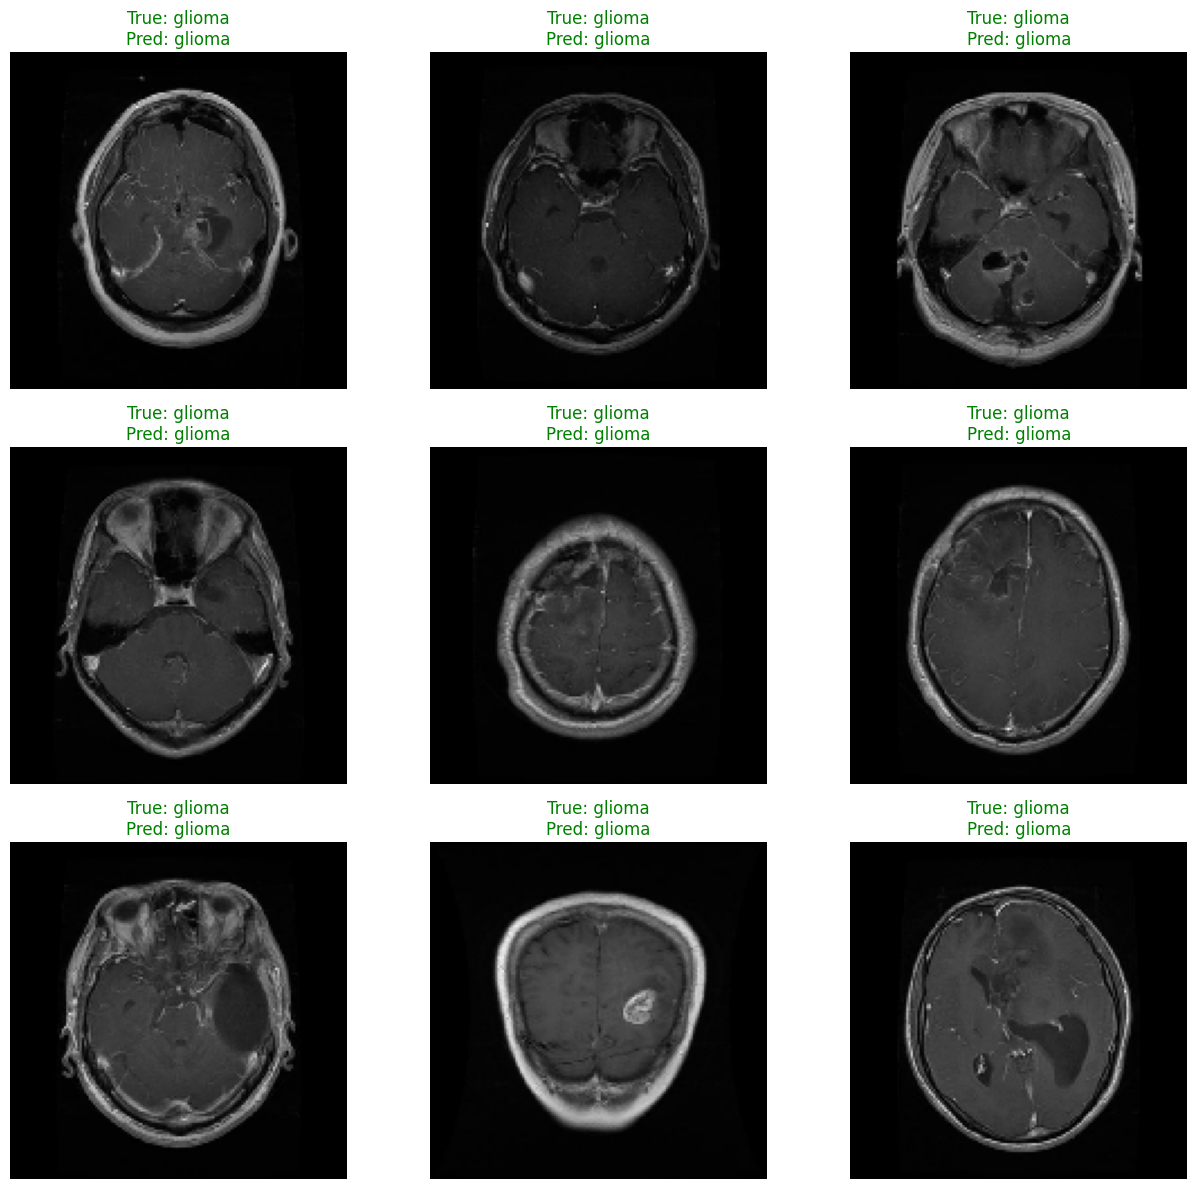

In [45]:
# List of class labels
categories = list(class_indices_train.keys())

# Plot a few sample predictions from the test set
plot_sample_predictions(
    model=model_3, 
    test_generator=test_generator, 
    categories=categories,
    test_dir=test_dir, 
    num_samples=9,
    figsize=(13, 12)
    
)

### **Extra Insights-- Model Implementation:**

In [74]:
# Step 1: Define Image Size, Batch Size, and Augmentation
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    brightness_range=(0.85, 1.15),
    width_shift_range=0.02,
    height_shift_range=0.02,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Create Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

# Step 3: Convert Data Generators to TensorFlow Datasets
def convert_to_tensorflow_dataset(generator):
    """
    Converts a Keras ImageDataGenerator to a tf.data.Dataset.
    
    Args:
        generator: The Keras ImageDataGenerator to convert.

    Returns:
        A tf.data.Dataset object.
    """
    return tf.data.Dataset.from_generator(
        lambda: generator,
        output_signature=(
            tf.TensorSpec(shape=(None, *image_size, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, len(generator.class_indices)), dtype=tf.float32)
        )
    )

# Convert generators to tf.data.Dataset
train_dataset = convert_to_tensorflow_dataset(train_generator)
validation_dataset = convert_to_tensorflow_dataset(validation_generator)
test_dataset = convert_to_tensorflow_dataset(test_generator)

# Step 4: Optimize Data Loading with Prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### **Define the CNN Model Architecture**

The following architecture is designed to capture complex patterns in the brain MRI images while maintaining an efficient structure suitable for our dataset:

In [79]:
# Define CNN Model
model_4 = Sequential([
    Input(shape=(224, 224, 3)),  # Input layer with shape of resized images
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer with softmax for multi-class classification
])

- Conv2D Layers: Extract features using a series of convolutional filters with increasing depth, capturing different levels of detail.
- BatchNormalization: Stabilizes and speeds up training by normalizing the output of the previous layer.
- MaxPooling2D: Reduces the spatial dimensions, focusing on the most important features and reducing computational load.
- Flatten Layer: Converts 2D feature maps into a 1D vector, making it suitable for the dense layers.
- Dense Layers: Learn high-level representations of the features, with 512 and 256 units providing complexity.
- Dropout: Drops 50% of the neurons during training to prevent overfitting, helping the model generalize better.
- Softmax Activation: Used in the output layer for multi-class classification, predicting the probability of each class.

### **Model Compilation**
We compile the model with the Adam optimizer, categorical_crossentropy loss function, and accuracy as the evaluation metric.



In [80]:
# Compile the model
model_4.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [81]:
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,213,316 (100.00 MB)

 Trainable params: 26,212,356 (99.99 MB)

 Non-trainable params: 960 (3.75 KB)

### **Define Callbacks for Training**

We use early stopping, model checkpointing, and a learning rate scheduler to improve training efficiency and prevent overfitting:

In [82]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Define model checkpointing 
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True
)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    min_lr=1e-6
)


- Early Stopping: Stops training if the validation loss does not improve for 10 epochs, preventing the model from overfitting.
- ModelCheckpoint: Saves the best model based on validation loss, ensuring we retain the model with the best performance.
- ReduceLROnPlateau: Reduces the learning rate by a factor of 0.5 if the validation loss plateaus, allowing for finer adjustments during later stages of training.

### **Model Training**

In [84]:
# Train the model
history_4 = model_4.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, lr_scheduler],
    # steps_per_epoch=train_generator.samples // batch_size,
    # validation_steps=validation_generator.samples // batch_size
)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 234ms/step - accuracy: 0.4062 - loss: 1.3400 - val_accuracy: 0.2805 - val_loss: 1.7482 - learning_rate: 0.0010
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.4125 - loss: 1.2873 - val_accuracy: 0.3953 - val_loss: 1.7862 - learning_rate: 0.0010
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - accuracy: 0.4130 - loss: 1.3214 - val_accuracy: 0.3883 - val_loss: 1.4365 - learning_rate: 0.0010
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.4532 - loss: 1.5832 - val_accuracy: 0.4601 - val_loss: 3.4766 - learning_rate: 0.0010
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.4039 - loss: 1.5625 - val_accuracy: 0.3094 - val_loss: 1.8356 - learning_rate: 0.0010
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - accuracy: 0.4039 - loss: 1.2884 - val_accuracy: 0.3935 - val_loss: 2.4911 - learning_rate: 0.0010
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - accuracy: 0.3

In [52]:
# # Save the trained model_3
# model_4.save('trained_model_4.keras')


## <center>**Transfer Learning**

**What is Transfer Learning?**

Transfer learning is a technique where a pre-trained model, which has already learned features from a large dataset (like ImageNet), is used as the starting point for a new task. Instead of training a deep learning model from scratch, we can use the pre-trained model's ability to extract features and adapt it for a new dataset. This approach is especially useful when dealing with limited data or when training a deep network from scratch would be computationally expensive.

In our case, we'll use the VGG16 architecture, which is trained on the ImageNet dataset, and adapt it for our brain tumor classification task. This approach can improve model performance, especially when working with a smaller dataset, by leveraging learned features from a larger dataset.

In [2]:
from imports import *


In [3]:
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input


In [4]:
model_vgg = VGG16(weights='imagenet', include_top=False)


2024-10-27 21:01:07.192087: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-10-27 21:01:07.192136: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-10-27 21:01:07.192144: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-10-27 21:01:07.192327: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-27 21:01:07.192352: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model_vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import os

# Load VGG16 model without top layers (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
train_dir = '/Users/seif-git/Documents/Capstone/Tumar/Training'
validation_dir = '/Users/seif-git/Documents/Capstone/Tumar/Validation'
test_dir = '/Users/seif-git/Documents/Capstone/Tumar/Testing'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5143 images belonging to 2 classes.
Found 569 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.


In [11]:
# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

In [9]:
from imports import *

In [15]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']    
)

In [16]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/Users/seif-git/miniforge3/envs/tf_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2024-10-27 22:25:28.858427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


161/161 ━━━━━━━━━━━━━━━━━━━━ 30s 175ms/step - accuracy: 0.9650 - loss: 0.0363 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 28s 171ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 26s 159ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 27s 166ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 26

In [17]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy:.2f}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test accuracy: 1.00


---
---
>>> ## <center>**BRAIN TUMOR DETECTION & CLASSIFICATION USING DEEP LEARNING--CAPSTONE PROJECT**
---
---